In [8]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core import load_param
from core import load_result
from core import load_H_list
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


<h1>Simulation<h1\>

This file is exclusively for running simulation. Attached to them should be a small descriptive text for why this is a useful simulation.

The following simulation is a basic block diagonal simulation. It shows the process of decoherence by starting in a superposition of 2 pointer states and an environment energy eigenstsate, then orthogonalizing the 2 environment state, essentially making it 2 worlds having observed 2 results. The collapse gif is clear.

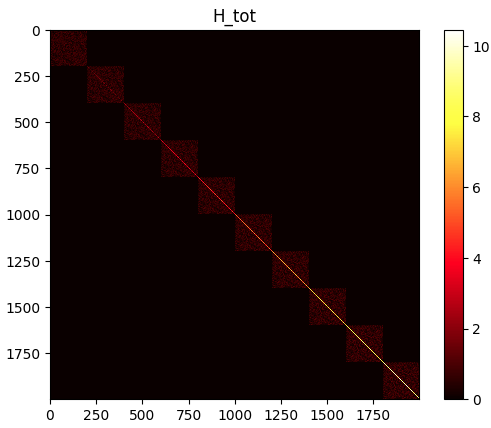 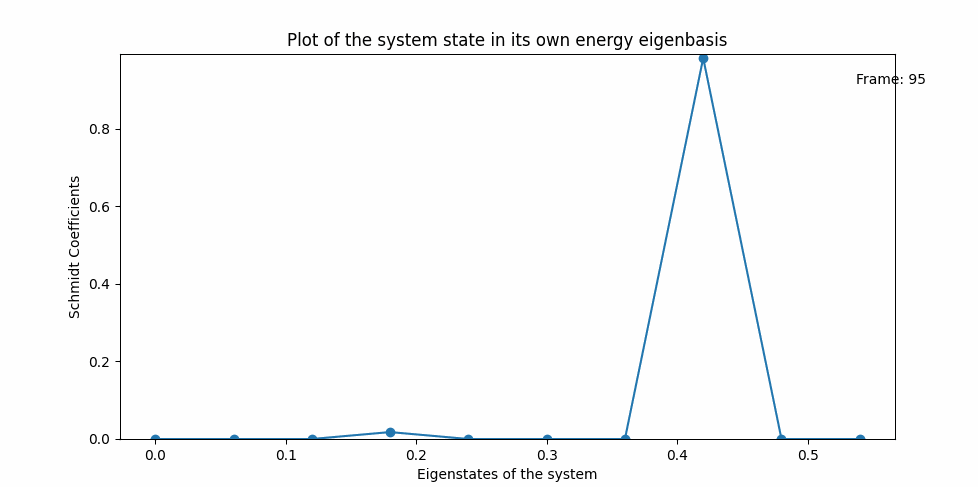

In [2]:
#To get a very clear collapse, we choose the following parameters.
#Essentially, weare making the system interactio a diagonal matrix, ie interaction depends on coherent states.
#H = [(E_s x diag(i) + E_s2 x id)x id ] + [(E_int_s x off_diag_sqrt(i) + E_int_s2 x id) x (E_int_e x rd_mat1 + E_int_e2 x id)] + [id x (E_e x H_e_self + E_e2 x id)]
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0
file_name="basic_block_diagonal_w_decoherence"
# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


More general ACL simulation. The goal of which is to get equilibriation in an obvious manner. This one in particular has variation in Es and Eint interestingly.

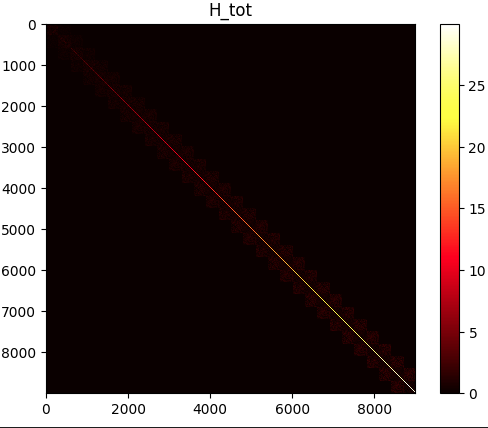 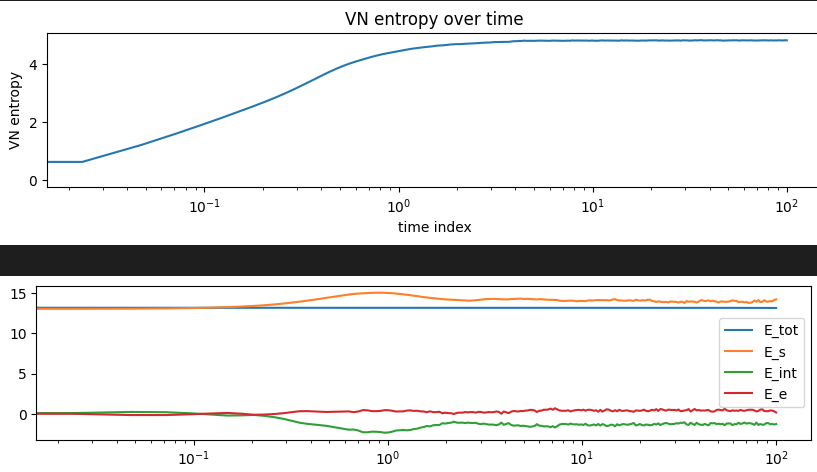 

In [3]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.5; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 100; ind_nb = 200;log=1
file_name = "ACL_eq_1"
# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


Another ACL simulation. The goal of which is to get equilibriation in an obvious manner. This one has variation in Es and Ee interestingly.



In [4]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 500; ind_nb = 500;log=1
file_name = "ACL_eq_2"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


In [2]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 500; ind_nb = 500;log=1
file_name = "ACL_eq_3"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


In [3]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0];envi=[0]; tmax= 400; ind_nb = 500;log=1
file_name = "ACL_eq_4"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


In [5]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.3; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 400; ind_nb = 600;log=1
file_name = "ACL_eq_5"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


In [9]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 1000; ind_nb = 1000;log=1
file_name = "ACL_eq_3_extended"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)


In [12]:
d1=20;d2=400;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0];envi=[0]; tmax= 900; ind_nb = 1200;log=1
file_name = "ACL_eq_4_extended"

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)
